In [1]:
from langchain_community.document_loaders import PyPDFDirectoryLoader
loader = PyPDFDirectoryLoader("data")
documents = loader.load()

In [2]:
len(documents)

23

In [3]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000,  # chunk size (characters)
    chunk_overlap=200,  # chunk overlap (characters)
    add_start_index=True,  # track index in original document
)
all_splits = text_splitter.split_documents(documents)

print(f"Split blog post into {len(all_splits)} sub-documents.")

Split blog post into 54 sub-documents.


In [3]:
from langchain_chroma import Chroma
from langchain_openai import OpenAIEmbeddings
vector_store = Chroma(
    embedding_function=OpenAIEmbeddings(model="text-embedding-3-small"),
    persist_directory='my_chroma_db',
    collection_name='sample'
)

In [ ]:
def clean_text(text: str) -> str:
    # Remove or replace invalid surrogate characters
    return text.encode("utf-8", "ignore").decode("utf-8", "ignore")

# Clean all page_content
for doc in all_splits:
    doc.page_content = clean_text(doc.page_content)

# Now add safely
vector_store.add_documents(all_splits)

['e26fa6c6-3f32-4cbf-b536-f4435bf35630',
 'c3fd2458-7186-455f-a2ec-3a13f61c908b',
 'f558fdba-cf30-43b5-91aa-759679a70aff',
 '1c74e255-269d-4c1e-bfb8-34369383a808',
 '0004e75d-3689-46c1-b325-cab6014cb571',
 '13a6b82a-d3a7-4d04-9f85-54f920d2695c',
 '6aeae604-35ac-4388-aebd-5be44ce44323',
 'f7912c73-0c79-453f-a22b-db1bfa5ce623',
 'd7c2b837-cec6-444e-b993-adf83161625e',
 '79637f36-5f47-42a9-90dd-8af0f2a870a4',
 '6ae9b959-440a-42d4-99d2-699b76dd8aca',
 'b71b0818-cf45-43fb-8375-ac737585c84c',
 '809d4203-09a8-4a61-aa85-ab976e723d0d',
 '04fc9a26-1bf9-48fb-9c16-0d19f07bce66',
 '12c0936d-fd9a-42f5-9cf2-9daf0cfeace5',
 '2a394b8b-fe35-4b43-8078-b26da98d4724',
 'a515ac24-3b17-4c52-88b3-a7d69f696310',
 '0ddced56-01cb-486f-98f7-337838f96fce',
 '29e985d2-91b4-49b6-8896-5bfb0de6958b',
 '96c92b60-9c7f-488c-ac8f-840abb50c588',
 '9b634488-c953-4f6a-a39c-79808919c16f',
 '506484c6-8afa-4d75-a991-02c2575f433e',
 '08d67b9f-6737-46f3-a0c0-01a7667f79e2',
 'f8470536-6957-4883-a350-7202fcd1cd1d',
 'e49db0f3-d6a5-

In [4]:
retriever = vector_store.as_retriever()

In [5]:
from langchain_classic.tools.retriever import create_retriever_tool

retriever_tool = create_retriever_tool(
    retriever,
    "retrieve_CGU_docs",
    "Search and return information(only for fee structure and eligibility criteria for different brach/students) about C.V Raman Global University,Bhubaneswar , Odisha.",
)

In [6]:
retriever_tool.invoke({"query": "Fee structure for Mtech"})

'Tuition Fee Structure \nProgram Branch Fee Per Semester Duration \nBTech Computer Sc. \nEngineering (AI & \nMachine Learning) \n150000 4 Years \nBTech Computer Sc. \nEngineering (Data \nScience) \n145000 4 Years \nBTech Computer Sc. \nEngineering (IoT & \nCyber Security) \n145000 4 Years \nBTech Computer Science \nand Engineering \n145000 4 Years \nBTech Computer Sc. & IT 145000 4 Years \nBTech Robotics and \nArtificial \nIntelligence \n145000 4 Years \nBTech Artificial \nIntelligence and \nData Science \n145000 4 Years \nBTech Electronic & \nCommunication \nEngineering \n125000 4 Years \nBTech Chemical \nEngineering \n112500 4 Years \nBTech Civil Engineering 112500 4 Years \nBTech Electrical \nEngineering \n112500 4 Years \nBTech Mechanical \nEngineering \n112500 4 Years \nBTech Marine Engineering 112500 4 Years \n \n \n \nLATERAL ENTRY TO B.TECH \nProgram Fee Per Semester/Year Duration \nCOMPUTER SCIENCE AND \nENGINEERING \n1,12,500/- per Semester 3 Years \nCOMPUTER SC. & IT. 1,12,5

In [9]:
from langchain_tavily import TavilySearch
from dotenv import load_dotenv
load_dotenv()
tool = TavilySearch(
    max_results=5,
    include_raw_content=True,
    search_depth="advanced",
    include_domains=[
        "https://cgu-odisha.ac.in/notice/",
        "https://cgu-odisha.ac.in/examination-cell/",
        "https://x.com/CguOdisha",
        "https://cgu-odisha.ac.in/all-stdent-activities/",
    ],
)

In [10]:
tool.invoke("give me the information about HR conclave 2025")

{'query': 'give me the information about HR conclave 2025',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'url': 'https://x.com/CguOdisha/status/1994018867560263757',
   'title': 'We are excited to invite you to a one-day HR Conclave on: ...',
   'content': 'CGU ODISHA on X: "We are excited to invite you to a one-day HR Conclave on: “Transforming Workplace for the Future – Innovation, Inclusion &amp; Wellbeing” 📅 Date: 29th November 2025 (Saturday) ⏰ Time: 10:00 AM – 5:00 PM 📍 Venue: RIHC Auditorium, C. V. Raman Global University, Bhubaneswar" / X\n\nDon’t miss what’s happening\n\nPeople on X are the first to know.\n\nLog in\n\nSign up\n\n Image 3: ⏰ Time: 10:00 AM – 5:00 PM Image 4: 📍 Venue: RIHC Auditorium, C. V. Raman Global University, Bhubaneswar [...] |\n\nAccessibility\n\n|\n\nAds info\n\n|\n\nMore\n\n© 2025 X Corp. [...] 12:21 PM · Nov 27, 2025\n\n·\n\n19\n\nViews\n\nNew to X?\n\nSign up now to get your own personalized timeline!\n\nSign up with Ap

In [11]:
from typing_extensions import TypedDict
from typing import Annotated
from langgraph.graph.message import add_messages

class message_state(TypedDict):
    messages: Annotated[list,add_messages]

In [12]:
from langgraph.graph import MessagesState
from langchain.chat_models import init_chat_model
from langchain.messages import SystemMessage

response_model = init_chat_model("openai:gpt-4o-mini", temperature=0)

from datetime import datetime, timezone
now_iso = datetime.now(timezone.utc).isoformat(timespec="seconds")
def generate_query_or_respond(state: message_state) -> message_state:
    """Call the model to generate a response based on the current state. Given
    the question, it will decide to retrieve using the retriever tool,tavily tool or simply respond to the user.
    """
    now_iso = datetime.now(timezone.utc).isoformat(timespec="seconds")
    sys = SystemMessage(content=
                        f"You are an assistant for question-answering tasks for C.V Raman global university,Bhubaneswar,Odisha,India (CGU)."
                        f"will decide to retrieve using the retriever tool(only for fee structure and eligibility criteria for different brach/students),tavily tool(Any other univercity related) or simply respond to the user."
                        f"Give me answers only to what user ask; don’t include unnecessary information outside user's query"
                        f"Current UTC datetime: {now_iso}. Use it to resolve relative dates.")
    msgs = [sys, *state["messages"]]

    response = (
        response_model
        .bind_tools([retriever_tool,tool]).invoke(msgs)  
    )
    return {"messages": [response]}

In [13]:
input = {"messages": [{"role": "user", "content": "hello!"}]}
generate_query_or_respond(input)["messages"][-1].pretty_print()

================================== Ai Message ==================================

Hello! How can I assist you today?


In [14]:
input = {
    "messages": [
        {
            "role": "user",
            "content": "fee structure for Btech?",
        }
    ]
}
generate_query_or_respond(input)["messages"][-1].pretty_print()

================================== Ai Message ==================================
Tool Calls:
  retrieve_CGU_docs (call_fTB0KztiIN8ZmcdBc1STpWEj)
 Call ID: call_fTB0KztiIN8ZmcdBc1STpWEj
  Args:
    query: Btech fee structure


In [15]:
input = {
    "messages": [
        {
            "role": "user",
            "content": "What are the recent event held in cgu?",
        }
    ]
}
generate_query_or_respond(input)["messages"][-1].pretty_print()

================================== Ai Message ==================================
Tool Calls:
  tavily_search (call_9OFBmbzVjhKfWrNfNvPH27yv)
 Call ID: call_9OFBmbzVjhKfWrNfNvPH27yv
  Args:
    query: recent events at C.V Raman Global University Bhubaneswar
    include_domains: ['cgu.edu.in']


In [46]:
input = {
    "messages": [
        {
            "role": "user",
            "content": "What are the eligibility criteria for Btech?",
        }
    ]
}
generate_query_or_respond(input)["messages"][-1].pretty_print()

================================== Ai Message ==================================
Tool Calls:
  retrieve_CGU_docs (call_mswNBvwFd8hctDJ88zHysN2a)
 Call ID: call_mswNBvwFd8hctDJ88zHysN2a
  Args:
    query: eligibility criteria for Btech


In [36]:
from pydantic import BaseModel, Field
from typing import Literal

GRADE_PROMPT = (
    "You are a grader assessing relevance of a retrieved document to a user question. \n "
    "Here is the retrieved document: \n\n {context} \n\n"
    "Here is the user question: {question} \n"
    "If the document contains keyword(s) or semantic meaning related to the user question, grade it as relevant. \n"
    "Give a binary score 'yes' or 'no' score to indicate whether the document is relevant to the question."
)


class GradeDocuments(BaseModel):  
    """Grade documents using a binary score for relevance check."""

    binary_score: str = Field(
        description="Relevance score: 'yes' if relevant, or 'no' if not relevant"
    )


grader_model = init_chat_model("openai:gpt-4o-mini", temperature=0)


def grade_documents(state: MessagesState) -> dict:
    """Determine whether the retrieved documents are relevant to the question."""
    question = state["messages"][0].content
    context = state["messages"][-1].content

    prompt = GRADE_PROMPT.format(question=question, context=context)
    response = (
        grader_model
        .with_structured_output(GradeDocuments)
        .invoke([{"role": "user", "content": prompt}])
    )
    
    # Return state update
    return {"documents_relevant": response.binary_score == "yes"}

In [37]:
from langchain_core.messages import convert_to_messages

input = {
    "messages": convert_to_messages(
        [
            {
                "role": "user",
                "content": "What are the events held in cgu?",
            },
            {
                "role": "assistant",
                "content": "",
                "tool_calls": [
                    {
                        "id": "1",
                        "name": "retrieve_cgu_docs",
                        "args": {"query": "types of reward hacking"},
                    }
                ],
            },
            {"role": "tool", "content": "meow", "tool_call_id": "1"},
        ]
    )
}
grade_documents(input)

{'documents_relevant': False}

In [18]:
REWRITE_PROMPT = (
    "Look at the input and try to reason about the underlying semantic intent / meaning.\n"
    "Here is the initial question:"
    "\n ------- \n"
    "{question}"
    "\n ------- \n"
    "Formulate an improved question:"
)


def rewrite_question(state: message_state) -> message_state:
    """Rewrite the original user question."""
    messages = state["messages"]
    question = messages[0].content
    prompt = REWRITE_PROMPT.format(question=question)
    response = response_model.invoke([{"role": "user", "content": prompt}])
    return {"messages": [{"role": "user", "content": response.content}]}

In [39]:
input = {
    "messages": convert_to_messages(
        [
            {
                "role": "user",
                "content": "What are the fee structure for Btech?",
            },
            {
                "role": "assistant",
                "content": "",
                "tool_calls": [
                    {
                        "id": "1",
                        "name": "retrieve_CGU_docs",
                        "args": {"query": "b-tech fee structure"},
                    }
                ],
            },
            {"role": "tool", "content": "meow", "tool_call_id": "1"},
        ]
    )
}

response = rewrite_question(input)
print(response["messages"][-1]["content"])

What is the fee structure for a B.Tech program?


In [19]:
GENERATE_PROMPT = (
    "You are an assistant for question-answering tasks for C.V Raman global university,Bhubaneswar,Odisha,India (CGU). "
    "Use the following pieces of retrieved context to answer the question. "
    "If tools answer is not related to the user question, just say that you don't know. "
    "Question: {question} \n"
    "Context: {context}"
)

model = init_chat_model("openai:gpt-4o", temperature=0)


def generate_answer(state: message_state) -> message_state:
    """Generate an answer."""
    question = state["messages"][0].content
    context = state["messages"][-1].content
    prompt = GENERATE_PROMPT.format(question=question, context=context)
    response = model.invoke([{"role": "user", "content": prompt}])
    return {"messages": [response]}

In [39]:
HALLUCINATION_PROMPT = (
    "You are a hallucination detector. Review the following answer in relation to the user's question.\n"
    "Question: {question}\n"
    "Answer: {answer}\n\n"
    "If the answer is factual, relevant, and grounded in the question context, respond 'no'. "
    "If it seems incorrect, fabricated, or off-topic, respond 'yes'."
)

class HallucinationCheck(BaseModel):
    hallucination: str = Field(
        description="Answer 'no' if the response is grounded and factual, else 'yes'."
    )

def check_hallucination(state: MessagesState) -> dict:
    """Check if the generated answer is hallucinated."""
    question = state["messages"][0].content
    answer = state["messages"][-1].content
    
    prompt = HALLUCINATION_PROMPT.format(question=question, answer=answer)
    response = (
        grader_model
        .with_structured_output(HallucinationCheck)
        .invoke([{"role": "user", "content": prompt}])
    )
    
    # Return state update
    return {"is_hallucinated": response.hallucination.lower() == "yes"}

In [40]:
def route_after_grading(state: MessagesState) -> Literal["generate_answer", "rewrite_question"]:
    """Route based on document relevance."""
    if state.get("documents_relevant", False):
        return "generate_answer"
    else:
        return "rewrite_question"

def route_after_hallucination(state: MessagesState) -> Literal["usefull", "not supported"]:
    """Route based on hallucination check."""
    if state.get("is_hallucinated", False):
        return "not supported"
    else:
        return "usefull"

In [41]:
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode, tools_condition

workflow = StateGraph(MessagesState)

# Define the nodes we will cycle between
workflow.add_node("generate_query_or_respond", generate_query_or_respond)
workflow.add_node("retrieve", ToolNode([retriever_tool, tool]))
workflow.add_node("grade_documents", grade_documents)
workflow.add_node("generate_answer", generate_answer)
workflow.add_node("check_hallucination", check_hallucination)
workflow.add_node("rewrite_question", rewrite_question)

# Start with query generation
workflow.add_edge(START, "generate_query_or_respond")

# Decide whether to retrieve or end
workflow.add_conditional_edges(
    "generate_query_or_respond",
    tools_condition,
    {
        "tools": "retrieve",
        END: END,
    },
)

# After retrieval, grade the documents
workflow.add_edge("retrieve", "grade_documents")

# After grading, decide next step
workflow.add_conditional_edges(
    "grade_documents",
    route_after_grading,
    {
        "generate_answer": "generate_answer",
        "rewrite_question": "rewrite_question",
    },
)

# After generating answer, check for hallucinations
workflow.add_edge("generate_answer", "check_hallucination")

# After checking hallucinations, decide whether to end or regenerate
workflow.add_conditional_edges(
    "check_hallucination",
    route_after_hallucination,
    {
        "usefull": END,
        "not supported": "generate_answer",
    },
)

# After rewriting question, go back to query generation
workflow.add_edge("rewrite_question", "generate_query_or_respond")

# Compile
graph = workflow.compile()

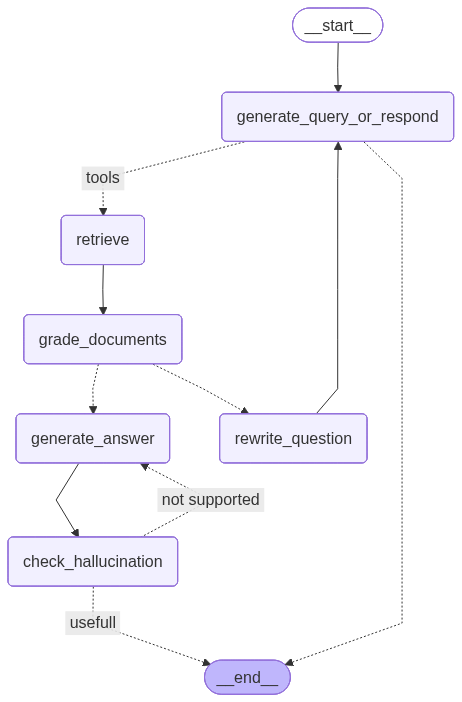

In [42]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [22]:
for chunk in graph.stream(
    {
        "messages": [
            {
                "role": "user",
                "content": "give me the fee structure of Btech",
            }
        ]
    },
):
    for node, update in chunk.items():
        print("Update from node", node)
        last_message = update["messages"][-1]

        # Check type before printing
        if hasattr(last_message, "pretty_print"):
            last_message.pretty_print()
        else:
            print(last_message)
        print("\n\n")

Update from node generate_query_or_respond
================================== Ai Message ==================================
Tool Calls:
  retrieve_CGU_docs (call_iDdtAVPbmKnlBoLMvIOLnPKY)
 Call ID: call_iDdtAVPbmKnlBoLMvIOLnPKY
  Args:
    query: BTech fee structure



Update from node retrieve
================================= Tool Message =================================
Name: retrieve_CGU_docs

Tuition Fee Structure 
Program Branch Fee Per Semester Duration 
BTech Computer Sc. 
Engineering (AI & 
Machine Learning) 
150000 4 Years 
BTech Computer Sc. 
Engineering (Data 
Science) 
145000 4 Years 
BTech Computer Sc. 
Engineering (IoT & 
Cyber Security) 
145000 4 Years 
BTech Computer Science 
and Engineering 
145000 4 Years 
BTech Computer Sc. & IT 145000 4 Years 
BTech Robotics and 
Artificial 
Intelligence 
145000 4 Years 
BTech Artificial 
Intelligence and 
Data Science 
145000 4 Years 
BTech Electronic & 
Communication 
Engineering 
125000 4 Years 
BTech Chemical 
Engineering 
112